<a href="https://colab.research.google.com/github/Pavanvarma007/-Pavan_INFO5731_Spring2023/blob/main/In_class_exercise_02_02072023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The second In-class-exercise (02/07/2023, 40 points in total)

The purpose of this exercise is to understand users' information needs, then collect data from different sources for analysis.

Question 1 (10 points): Describe an interesting research question (or practical question) you have in mind, what kind of data should be collected to answer the question(s)? How many data needed for the analysis? The detail steps for collecting and save the data. 

In [ ]:
1:a:The question i am going to analyse is details of the car such as type,manufactured year,price,fuel type and many more from the cars dekho website 
    ,which is popular website to buy used cars where all the details of the previous owner are displayed. 
 :b:for this i have to extract the data of cars from file by filtering the results.
 :c:more than 2,000 results are to be collected
 :d: We can collect the ratings of data by web scraping and it will be saved as a structured data,so that user can easily handle the data,
  we have to import beautiful soap library.

Question 2 (10 points): Write python code to collect 1000 data samples you discussed above.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Car details v3.csv')
data.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
total_km=data[data["km_driven"]<100000]
fuel_type=total_km[total_km["fuel"]=="Petrol"].sort_values(by='km_driven',ascending=False)
total_transmission=total_km[total_km["transmission"]=="Manual"].sort_values(by='km_driven',ascending=False)
print(fuel_type)
print(total_transmission)

                         name  year  selling_price  km_driven    fuel  \
302           Maruti Alto LXI  2005          90000      99361  Petrol   
4554      Maruti SX4 Vxi BSIV  2012         260000      99000  Petrol   
666         Maruti A-Star Zxi  2012         235000      98500  Petrol   
7425      Honda City 1.5 S MT  2010         360000      98000  Petrol   
2345    Hyundai i20 1.2 Magna  2011         350000      98000  Petrol   
...                       ...   ...            ...        ...     ...   
7589         Maruti Swift LXI  2020         445000       1000  Petrol   
7492     Hyundai Santro Magna  2020         500000       1000  Petrol   
2963     Maruti Swift AMT VXI  2020         654000       1000  Petrol   
7429         Maruti Swift LXI  2020         445000       1000  Petrol   
399   Honda City i-VTEC CVT V  2018        1085000       1000  Petrol   

     seller_type transmission         owner     mileage   engine  max_power  \
302   Individual       Manual  Second Owner 

Text(0, 0.5, 'selling_price')

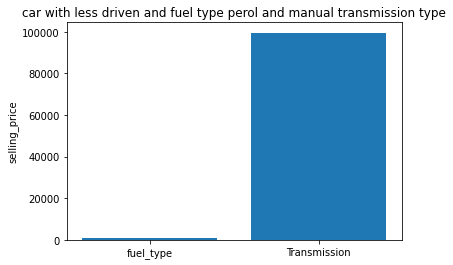

In [8]:
a=[]
a.append(fuel_type['km_driven'].min())
a.append(total_transmission['km_driven'].max())
b=["fuel_type","Transmission"]
plt.bar(b,a)
plt.title("car with less driven and fuel type perol and manual transmission type")
plt.ylabel('selling_price')

Question 3 (10 points): Write python code to collect 1000 articles from Google Scholar (https://scholar.google.com/), Microsoft Academic (https://academic.microsoft.com/home), or CiteSeerX (https://citeseerx.ist.psu.edu/index), or Semantic Scholar (https://www.semanticscholar.org/), or ACM Digital Libraries (https://dl.acm.org/) with the keyword "information retrieval". The articles should be published in the last 10 years (2012-2022).

The following information of the article needs to be collected:

(1) Title

(2) Venue/journal/conference being published

(3) Year

(4) Authors

(5) Abstract

In [11]:
from bs4 import BeautifulSoup
import requests
url = 'https://dl.acm.org/action/doSearch?AllField=used+cars+statistics'
response=requests.get(url)
soup=BeautifulSoup(response.content,'lxml')
for item in soup.select('[data-lid]'):
	try:
		print('----------------------------------------')
		print(item)
	except Exception as e:
		#raise e
		print('')
for item in soup.select('[data-lid]'): 
  try: 
    print('----------------------------------------') 
    #print(item) 
    print(item.select('h3')[0].get_text()) 
    print(item.select('a')[0]['href']) 
    print(item.select('.gs_rs')[0].get_text()) 
    print('----------------------------------------') 
  except Exception as e:
     print('')

Question 4 (10 points): Write python code to collect 1000 posts from Twitter, or Facebook, or Instagram. You can either use hashtags, keywords, user_name, user_id, or other information to collect the data. 

The following information needs to be collected:

(1) User_name

(2) Posted time

(3) Text 

In [10]:
!pip install tweepy
import pandas as pd
import tweepy as tp
import pandas as pd
import csv
import re 
import string

consumer_key= '2Em7SxlX9jPMfL4x97r3zMO0x'
consumer_secret= 'sVbJzekKuiAgq83Y7gCwNVbSowqQokGVzWexKHl2cXIPceWtSd'
access_key= '1439767876962029572-uUMt8oWRyzj9ilE5zk4uYbL93sCMPT'
access_secret= 'oydIGymn9bS767FVEMawE9GyGAnMmBJfaY2XXKmHnmliF'

auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

api = tp.API(auth,wait_on_rate_limit=True)
 
csvFile = open('file-name', 'a')
csvWriter = csv.writer(csvFile)
 
search_words = "#Steve jobs"
new_search = search_words + " -filter:posts"
csvWriter.writerow(["created at","Text","User","Location"])
for tweet in tp.Cursor(api.search,q=new_search,count=100,
                           lang="en",
                           since_id=0).items():
    
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
